### Combine all csvs into a Dataframe

- URL columns discarded
- currency column discarded since all entries are in USD
- name column discarded
- codCountry (country code) discarded

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def import_csvs(csv_files, selected_columns):
    dataframes = []
    
    for csv_file in csv_files:
        df = pd.read_csv(csv_file, usecols=selected_columns)
        dataframes.append(df)
    
    combined_df = pd.concat(dataframes, ignore_index=True)
    
    return combined_df

csv_files = [
    'accessories.csv', 'bags.csv', 'beauty.csv', 'house.csv', 
    'jewelry.csv', 'kids.csv', 'men.csv', 'shoes.csv', 'women.csv'
]

# selected column after discarding the irrelevant columns
selected_columns = [
    'category', 'subcategory', 'current_price', 'raw_price', 
    'discount', 'likes_count', 'is_new', 'brand', 'variation_0_color', 'variation_1_color', 'id', 'model'
]

combined_df = import_csvs(csv_files, selected_columns)
combined_df.head()

,category,subcategory,current_price,raw_price,discount,likes_count,is_new,brand,variation_0_color,variation_1_color,id,model
0,accessories,Chapeaux & Bonnets,9.99,16.99,41,373,False,NaN,Gray,Blue,1671872,SKUF08305
1,accessories,Baseball Caps,9.99,18.99,47,73,False,NaN,Navy,Black,1674377,SKUF11351
2,accessories,Flat Caps,17.49,37.34,53,140,False,NaN,Black,camel,1637790,SKUE50978
3,accessories,Cache-oreilles & Masques,5.99,16.01,63,686,False,NaN,#01,#02,1654953,SKUE76490
4,accessories,Chapeaux & Bonnets,13.99,26.99,48,35,False,NaN,Black,Army Green,1666600,SKUE75375


#### Handling NULL values

In [2]:
# Check for null values in each column
null_values = combined_df.isnull().sum()
print(null_values[null_values > 0])

brand                60838
variation_0_color    11784
variation_1_color    22347
dtype: int64


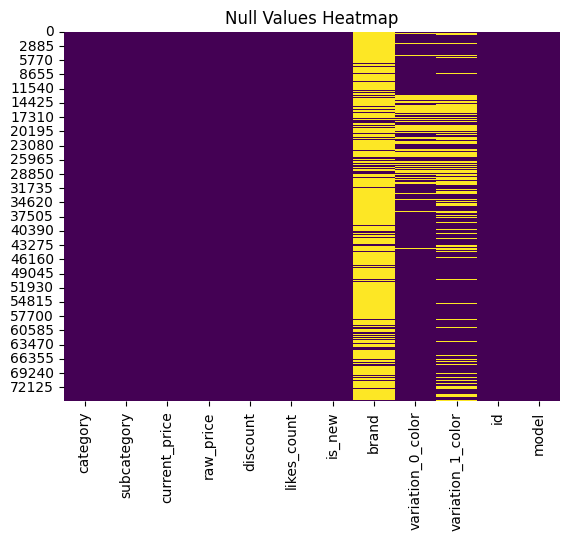

In [3]:
# Visualize null values
sns.heatmap(combined_df.isnull(), cbar=False, cmap='viridis')
plt.title('Null Values Heatmap')
plt.show()

In [4]:
combined_df['brand'].fillna('Unknown', inplace=True)
combined_df['variation_0_color'].fillna('Unknown', inplace=True)
combined_df['variation_1_color'].fillna('Unknown', inplace=True)

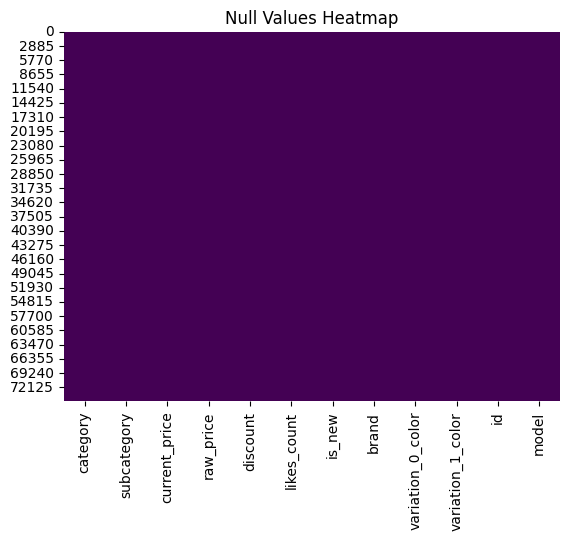

In [5]:
# Visualize null values
sns.heatmap(combined_df.isnull(), cbar=False, cmap='viridis')
plt.title('Null Values Heatmap')
plt.show()

In [16]:
unique_values = combined_df['variation_0_color'].unique()

print(unique_values)

['Gray' 'Navy' 'Black' '#01' 'Leopard' 'Unknown' 'Yellow' 'Red' 'Khaki'
 'Blue' 'Army Green' 'Green' '# 01' 'kaki' 'Dark Gray' 'Rose' 'Light Blue'
 'marron' 'Bleu ciel' 'Noir' '#1' 'Gris' 'armée verte' 'Bleu foncé'
 'blanc' 'White' 'Rose rouge' 'Bleu' 'Beige' 'Pink' 'café' 'rouge'
 'Marine' 'Jaune' 'vert' 'Vert clair' 'Brown' 'Purple' 'Grey' 'gris'
 'Vert foncé' 'Orange' 'Bleu profond' 'Violet' 'Rose et gris' 'Nu' '1'
 'Café noir' 'Blanc 1' 'Bleu clair' '# 05' '\xa0Point' '# 02' '# 06'
 'Gris clair' 'Gris foncé' 'argent' 'Rose clair' '#8' '# 03' '# 07'
 'chameau' 'au hasard' 'Vin rouge' 'Violet clair' 'Rouge foncé'
 'Bleu rouge' 'Coffe légère' '[manual] TYX0-silver bee hair ball bracelet'
 'Black wavelet point lambskin [wristband + scarf]'
 'Light blue [solid color shell pattern] l2' '# 11' '#2' 'Or' '#3'
 'Gun buckle with black belt' 'Floating unicorn' 'Transparent powder'
 'Gold' 'Grey1' 'Kaki clair' 'Noir 1' 'Noir + Blanc' '# 16' 'Noir clair'
 'C1' 'Abricot' '06' 'royal Blue' 'Light

In [12]:
# save the filtered DataFrame to a CSV file
combined_df.to_csv('combined_data.csv', index=False)

#### Discount vs Like | Current Price vs Like | Raw Price vs Discount plotted

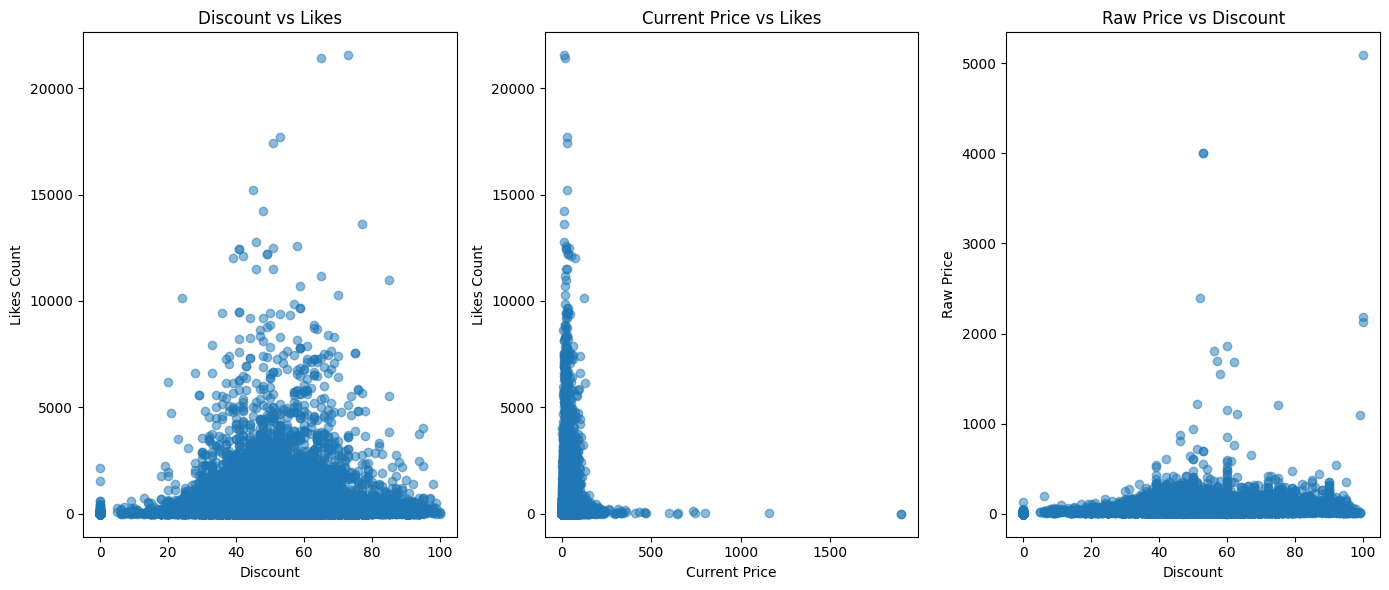

In [13]:
# Figure with 2 subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 3, figsize=(14, 6))

# Discount vs Likes
axs[0].scatter(combined_df['discount'], combined_df['likes_count'], alpha=0.5)
axs[0].set_title('Discount vs Likes')
axs[0].set_xlabel('Discount')
axs[0].set_ylabel('Likes Count')

# Current Price vs Likes
axs[1].scatter(combined_df['current_price'], combined_df['likes_count'], alpha=0.5)
axs[1].set_title('Current Price vs Likes')
axs[1].set_xlabel('Current Price')
axs[1].set_ylabel('Likes Count')

# Raw Price vs Discount
axs[2].scatter(combined_df['discount'], combined_df['raw_price'], alpha=0.5)
axs[2].set_title('Raw Price vs Discount')
axs[2].set_xlabel('Discount')
axs[2].set_ylabel('Raw Price')

plt.tight_layout()
plt.show()

Price vs Like vs Discount plotted together

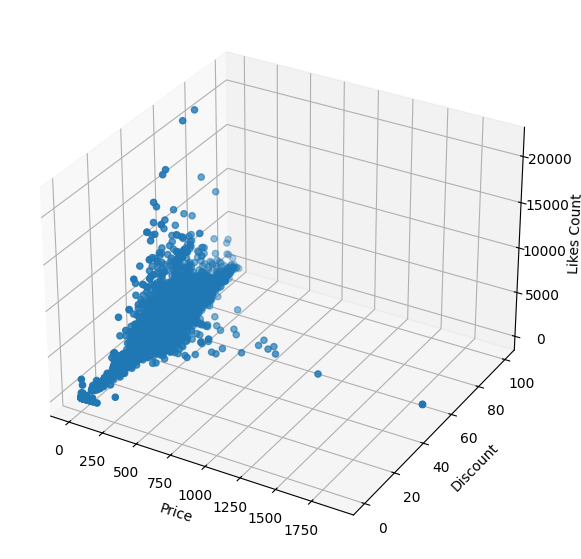

In [14]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(combined_df['current_price'], combined_df['discount'], combined_df['likes_count'])

# Set labels
ax.set_xlabel('Price')
ax.set_ylabel('Discount')
ax.set_zlabel('Likes Count')

plt.show()


In [ ]:
1. liked colors
2. 